In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import decimal
import warnings
from scipy.spatial import distance

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
#df_inp = pd.read_csv('Master_Data_Gluten_Free_Muffins_process.csv', encoding='ISO-8859–1')  # 'utf-8'
# df_inp = pd.read_excel('Master_Data_Gluten_Free_Muffins.xlsx')
df_inp = pd.read_csv(r'F:/data_science/Blu-Cocoon/Muffin/GFM/Master_Data_Gluten_Free_Muffins_process (2).csv', encoding='ISO-8859–1', index_col=False)

In [3]:
print(df_inp.head())

                       ï»¿Sample_Name Sample_Date      Product_Base  \
0  HOMECRAFTÂ® Create GF 10 (Control)  02-12-2020  Rice and Tapioca   
1                     NOVATIONÂ® 3600  02-12-2020           Tapioca   
2              HOMECRAFTÂ® Create 390  02-12-2020           Tapioca   
3  HOMECRAFTÂ® Create GF 10 (Control)  07-05-2021  Rice and Tapioca   
4                     HI-MAIZEÂ®  260  07-05-2021              Corn   

  Product_Type Batch_Number Moisture_min  Moisture_max pH_min pH_max  \
0      Cook Up      DKI0198           10          14.0      5    7.5   
1      Cook Up      LKG2562            x          15.0      5    6.5   
2      Cook Up      LHI0137           10          13.0    4.8    6.5   
3      Cook Up      DAI0335           10          14.0      5    7.5   
4      Cook Up      MJI2643           10          14.0      5      7   

   Viscosity_min Viscosity_max thru_USS_20 thru_USS_40 thru_USS_60  \
0            NaN           600         NaN         NaN         NaN   


In [4]:
df_inp = df_inp.set_axis(['Sample_Name','Sample_Date', 'Product_Base', 'Product_Type', 'Batch_Number',
       'Moisture_min', 'Moisture_max', 'pH_min', 'pH_max', 'Viscosity_min',
       'Viscosity_max', 'thru_USS_20', 'thru_USS_40', 'thru_USS_60',
       'thru_USS_80', 'thru_USS_100', 'thru_USS_200', 'Amylose', 'Amylopectin',
       'dp_6_to_12', 'dp_13_to_24', 'dp_25_to_36', 'dp_greater_37', 'Protein',
       'Total_Carbohydrate', 'Dietary_Fiber', 'Fat', 'Ash', 'Bostwick',
       'Yield_Repl_1', 'Yield_Repl_2', 'Yield_Repl_3', 'Yield_Repl_4',
       'Yield_Repl_5', 'Vol_Repl_1', 'Vol_Repl_2', 'Vol_Repl_3', 'Vol_Repl_4',
       'Vol_Repl_5', 'No_Hole_Repl_1', 'No_Hole_Repl_2', 'No_Hole_Repl_3',
       'No_Hole_Repl_4', 'No_Hole_Repl_5', 'Cell_Dia_Repl_1',
       'Cell_Dia_Repl_2', 'Cell_Dia_Repl_3', 'Cell_Dia_Repl_4',
       'Cell_Dia_Repl_5', 'Color_L_Val_Repl_1', 'Color_L_Val_Repl_2',
       'Color_L_Val_Repl_3', 'Color_L_Val_Repl_4', 'Color_L_Val_Repl_5',
       'Color_a_Val_Repl_1', 'Color_a_Val_Repl_2', 'Color_a_Val_Repl_3',
       'Color_a_Val_Repl_4', 'Color_a_Val_Repl_5', 'Color_b_Val_Repl_1',
       'Color_b_Val_Repl_2', 'Color_b_Val_Repl_3', 'Color_b_Val_Repl_4',
       'Color_b_Val_Repl_5', 'Init_Firmness_Repl_1', 'Init_Firmness_Repl_2',
       'Init_Firmness_Repl_3', 'Init_Firmness_Repl_4', 'Init_Firmness_Repl_5',
       'Shelf_Life_Firmness_Repl_1', 'Shelf_Life_Firmness_Repl_2',
       'Shelf_Life_Firmness_Repl_3', 'Shelf_Life_Firmness_Repl_4',
       'Shelf_Life_Firmness_Repl_5', 'Shelf_Life_Stability',
       'Freeze_Thaw_Firmness_Repl_1', 'Freeze_Thaw_Firmness_Repl_2',
       'Freeze_Thaw_Firmness_Repl_3', 'Freeze_Thaw_Firmness_Repl_4',
       'Freeze_Thaw_Firmness_Repl_5', 'Freeze_Thaw_Stability',
       'Moisture_Day_1', 'Moisture_Day_7', 'Water_Activity_Day_1',
       'Water_Activity_Day_7', 'Firmness', 'Denseness', 'Cohesiveness_of_Mass',
       'Moisture_Absorption', 'Amount_of_Particulates', 'Flavor_Intensity',
       'Action_Status'], axis=1)

In [5]:
df_inp

,Sample_Name,Sample_Date,Product_Base,Product_Type,Batch_Number,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,thru_USS_20,thru_USS_40,thru_USS_60,thru_USS_80,thru_USS_100,thru_USS_200,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Protein,Total_Carbohydrate,Dietary_Fiber,Fat,Ash,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Moisture_Day_1,Moisture_Day_7,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status
0,HOMECRAFTÂ® Create GF 10 (Control),02-12-2020,Rice and Tapioca,Cook Up,DKI0198,10,14.0,5,7.5,NaN,600,NaN,NaN,NaN,NaN,NaN,NaN,18.6,81.4,18.66,49.84,12.96,18.54,5.60,83.20,0.0,0.90,0.10,5.50,88.59%,88.30%,90.13%,89.44%,90.56%,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.90,55.01,-5.17,-3.77,-4.330,-4.13,-5.17,29.73,32.07,30.05,33.47,29.73,637.597,625.905,691.095,719.334,676.656,1784.327,1757.897,1859.252,1835.687,1924.499,173.43%,448.218,502.333,546.081,457.843,463.722,-27.83%,21%,20%,0.8700,0.8600,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NOVATIONÂ® 3600,02-12-2020,Tapioca,Cook Up,LKG2562,x,15.0,5,6.5,400.0,680,NaN,NaN,NaN,NaN,95%,85%,17.0,83.0,17.30,40.40,15.60,26.70,0.10,89.70,0.0,0.10,0.10,7.75,90.21%,84.93%,87.74%,92.08%,90.89%,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.27,48.59,0.13,-0.65,-0.510,0.26,0.76,31.49,29.27,30.25,32.45,32.72,508.972,499.430,496.205,425.587,346.701,1584.839,1464.271,1735.548,1603.726,1235.472,234.84%,274.178,317.535,271.251,221.169,274.525,-40.33%,21%,20%,0.8900,0.8800,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,HOMECRAFTÂ® Create 390,02-12-2020,Tapioca,Cook Up,LHI0137,10,13.0,4.8,6.5,NaN,NaN,NaN,90%,NaN,NaN,NaN,NaN,17.0,83.0,17.30,40.40,15.60,26.70,0.10,89.70,0.0,0.10,0.10,8.00,90.30%,90.74%,90.46%,90.95%,90.90%,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.16,43.82,-1.00,-1.15,-1.000,0.00,-0.54,31.36,32.56,31.36,31.23,31.56,415.291,353.498,478.378,432.913,416.678,1612.627,1670.070,1536.753,1251.513,1334.924,253.21%,195.105,274.404,258.130,236.448,232.699,-42.92%,22%,20%,0.8800,0.8700,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,HOMECRAFTÂ® Create GF 10 (Control),07-05-2021,Rice and Tapioca,Cook Up,DAI0335,10,14.0,5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,81.4,18.66,49.84,12.96,18.54,5.60,83.20,0.0,0.90,0.10,6.75,90.21%,90.90%,91.30%,90.77%,90.95%,107.51,114.80,112.50,114.01,112.64,0.390465,4.295823e-03,2.003070e+00,0.049836,0.002287,2.210308,2.402379,1.929003,1.955072,2.068319,45.42,49.24,49.240,48.88,47.03,-0.88,-1.71,-1.710,-1.49,-0.92,30.31,32.90,32.90,31.89,32.36,792.725,664.072,708.956,680.876,627.928,1586.414,1344.143,1772.912,1675.740,1859.688,137.12%,463.272,471.663,437.142,476.376,423.175,-34.62%,23%,19%,0.8801,0.8576,0.0,0.0,0.

In [6]:
df_inp_num = df_inp[['Moisture_min', 'Moisture_max', 'pH_min', 'pH_max', 'Viscosity_min',
       'Viscosity_max', 'Amylose', 'Amylopectin',
       'dp_6_to_12', 'dp_13_to_24', 'dp_25_to_36', 'dp_greater_37', 'Total_Carbohydrate', 'Dietary_Fiber', 'Bostwick',
       'Yield_Repl_1', 'Yield_Repl_2', 'Yield_Repl_3', 'Yield_Repl_4',
       'Yield_Repl_5', 'Vol_Repl_1', 'Vol_Repl_2', 'Vol_Repl_3', 'Vol_Repl_4',
       'Vol_Repl_5', 'No_Hole_Repl_1', 'No_Hole_Repl_2', 'No_Hole_Repl_3',
       'No_Hole_Repl_4', 'No_Hole_Repl_5', 'Cell_Dia_Repl_1',
       'Cell_Dia_Repl_2', 'Cell_Dia_Repl_3', 'Cell_Dia_Repl_4',
       'Cell_Dia_Repl_5', 'Color_L_Val_Repl_1', 'Color_L_Val_Repl_2',
       'Color_L_Val_Repl_3', 'Color_L_Val_Repl_4', 'Color_L_Val_Repl_5',
       'Color_a_Val_Repl_1', 'Color_a_Val_Repl_2', 'Color_a_Val_Repl_3',
       'Color_a_Val_Repl_4', 'Color_a_Val_Repl_5', 'Color_b_Val_Repl_1',
       'Color_b_Val_Repl_2', 'Color_b_Val_Repl_3', 'Color_b_Val_Repl_4',
       'Color_b_Val_Repl_5', 'Init_Firmness_Repl_1', 'Init_Firmness_Repl_2',
       'Init_Firmness_Repl_3', 'Init_Firmness_Repl_4', 'Init_Firmness_Repl_5',
       'Shelf_Life_Firmness_Repl_1', 'Shelf_Life_Firmness_Repl_2',
       'Shelf_Life_Firmness_Repl_3', 'Shelf_Life_Firmness_Repl_4',
       'Shelf_Life_Firmness_Repl_5', 'Shelf_Life_Stability',
       'Freeze_Thaw_Firmness_Repl_1', 'Freeze_Thaw_Firmness_Repl_2',
       'Freeze_Thaw_Firmness_Repl_3', 'Freeze_Thaw_Firmness_Repl_4',
       'Freeze_Thaw_Firmness_Repl_5', 'Freeze_Thaw_Stability',
       'Water_Activity_Day_1', 'Water_Activity_Day_7', 'Firmness', 'Denseness', 'Cohesiveness_of_Mass',
       'Moisture_Absorption', 'Amount_of_Particulates', 'Flavor_Intensity',
       'Action_Status']]

In [7]:
df_inp_num

,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Total_Carbohydrate,Dietary_Fiber,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status
0,10,14.0,5,7.5,NaN,600,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,5.50,88.59%,88.30%,90.13%,89.44%,90.56%,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.90,55.01,-5.17,-3.77,-4.330,-4.13,-5.17,29.73,32.07,30.05,33.47,29.73,637.597,625.905,691.095,719.334,676.656,1784.327,1757.897,1859.252,1835.687,1924.499,173.43%,448.218,502.333,546.081,457.843,463.722,-27.83%,0.8700,0.8600,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,x,15.0,5,6.5,400.0,680,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,7.75,90.21%,84.93%,87.74%,92.08%,90.89%,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.27,48.59,0.13,-0.65,-0.510,0.26,0.76,31.49,29.27,30.25,32.45,32.72,508.972,499.430,496.205,425.587,346.701,1584.839,1464.271,1735.548,1603.726,1235.472,234.84%,274.178,317.535,271.251,221.169,274.525,-40.33%,0.8900,0.8800,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,10,13.0,4.8,6.5,NaN,NaN,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,8.00,90.30%,90.74%,90.46%,90.95%,90.90%,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.16,43.82,-1.00,-1.15,-1.000,0.00,-0.54,31.36,32.56,31.36,31.23,31.56,415.291,353.498,478.378,432.913,416.678,1612.627,1670.070,1536.753,1251.513,1334.924,253.21%,195.105,274.404,258.130,236.448,232.699,-42.92%,0.8800,0.8700,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,10,14.0,5,7.5,NaN,NaN,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,6.75,90.21%,90.90%,91.30%,90.77%,90.95%,107.51,114.80,112.50,114.01,112.64,0.390465,4.295823e-03,2.003070e+00,0.049836,0.002287,2.210308,2.402379,1.929003,1.955072,2.068319,45.42,49.24,49.240,48.88,47.03,-0.88,-1.71,-1.710,-1.49,-0.92,30.31,32.90,32.90,31.89,32.36,792.725,664.072,708.956,680.876,627.928,1586.414,1344.143,1772.912,1675.740,1859.688,137.12%,463.272,471.663,437.142,476.376,423.175,-34.62%,0.8801,0.8576,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,14.0,5,7,NaN,600,70.0,30.0,8.50,40.70,21.30,29.50,40.60,48.0,6.50,91.28%,90.52%,90.23%,90.49%,90.77%,113.83,115.85,116.29,118.73,117.72,0.973653,1.434196e+00,4.506750e-04,0.000005,1.074542,2.311082,2.332885,2.570363,2.418133,2.193062,50.05,49.09,51.470,51.47,48.78,-1.46,-2.28,-2.070,-2.07,-1.93,31.16,31.01,31.31,31.31,31.75,573.806,614.401,672.330,601.434,537.947,1460.873,1481.020,1570.441,1522.625,1333.331,145.62%,383.848,465.773,430.413,483.293,397.829,-27.96%,0.8844,0.8293,1.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [8]:
# percentage to float conversion
def pct_to_float(df):
    df_pros = np.zeros((len(df), 1), dtype=float)
    for idx in range(len(df)):
        try:
            df_pros[idx] = pd.to_numeric(df[idx].replace('%', ''))
            #df_pros[idx] = pd.to_numeric(df[idx]/100)
        except:
            df_pros[idx] = pd.to_numeric(df[idx]*100)
    return df_pros

In [9]:
df_inp_num['Yield_Repl_1'] = pct_to_float(df_inp_num['Yield_Repl_1'])
df_inp_num['Yield_Repl_2'] = pct_to_float(df_inp_num['Yield_Repl_2'])
df_inp_num['Yield_Repl_3'] = pct_to_float(df_inp_num['Yield_Repl_3'])
df_inp_num['Yield_Repl_4'] = pct_to_float(df_inp_num['Yield_Repl_4'])
df_inp_num['Yield_Repl_5'] = pct_to_float(df_inp_num['Yield_Repl_5'])
df_inp_num['Shelf_Life_Stability'] = pct_to_float(df_inp_num['Shelf_Life_Stability'])
df_inp_num['Freeze_Thaw_Stability'] = pct_to_float(df_inp_num['Freeze_Thaw_Stability'])
#df_inp_num['Moisture_Day_1'] = pct_to_float(df_inp_num['Moisture_Day_1'])
#df_inp_num['Moisture_Day_7'] = pct_to_float(df_inp_num['Moisture_Day_7'])

df_inp_num

#df_inp_prd_moist = df_inp_prd_flt[['Sample Name', 'Product Base', 'Moisture (Min)', 'Moisture (Max)', 'Yield_Repl_1', 'Yield_Repl_2', 'Yield_Repl_3', 'Yield_Repl_4', 'Yield_Repl_5']]
#df_inp_prd_moist

,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Total_Carbohydrate,Dietary_Fiber,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status
0,10,14.0,5,7.5,NaN,600,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,5.50,88.59,88.30,90.13,89.44,90.56,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.90,55.01,-5.17,-3.77,-4.330,-4.13,-5.17,29.73,32.07,30.05,33.47,29.73,637.597,625.905,691.095,719.334,676.656,1784.327,1757.897,1859.252,1835.687,1924.499,173.43,448.218,502.333,546.081,457.843,463.722,-27.83,0.8700,0.8600,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,x,15.0,5,6.5,400.0,680,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,7.75,90.21,84.93,87.74,92.08,90.89,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.27,48.59,0.13,-0.65,-0.510,0.26,0.76,31.49,29.27,30.25,32.45,32.72,508.972,499.430,496.205,425.587,346.701,1584.839,1464.271,1735.548,1603.726,1235.472,234.84,274.178,317.535,271.251,221.169,274.525,-40.33,0.8900,0.8800,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,10,13.0,4.8,6.5,NaN,NaN,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,8.00,90.30,90.74,90.46,90.95,90.90,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.16,43.82,-1.00,-1.15,-1.000,0.00,-0.54,31.36,32.56,31.36,31.23,31.56,415.291,353.498,478.378,432.913,416.678,1612.627,1670.070,1536.753,1251.513,1334.924,253.21,195.105,274.404,258.130,236.448,232.699,-42.92,0.8800,0.8700,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,10,14.0,5,7.5,NaN,NaN,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,6.75,90.21,90.90,91.30,90.77,90.95,107.51,114.80,112.50,114.01,112.64,0.390465,4.295823e-03,2.003070e+00,0.049836,0.002287,2.210308,2.402379,1.929003,1.955072,2.068319,45.42,49.24,49.240,48.88,47.03,-0.88,-1.71,-1.710,-1.49,-0.92,30.31,32.90,32.90,31.89,32.36,792.725,664.072,708.956,680.876,627.928,1586.414,1344.143,1772.912,1675.740,1859.688,137.12,463.272,471.663,437.142,476.376,423.175,-34.62,0.8801,0.8576,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,14.0,5,7,NaN,600,70.0,30.0,8.50,40.70,21.30,29.50,40.60,48.0,6.50,91.28,90.52,90.23,90.49,90.77,113.83,115.85,116.29,118.73,117.72,0.973653,1.434196e+00,4.506750e-04,0.000005,1.074542,2.311082,2.332885,2.570363,2.418133,2.193062,50.05,49.09,51.470,51.47,48.78,-1.46,-2.28,-2.070,-2.07,-1.93,31.16,31.01,31.31,31.31,31.75,573.806,614.401,672.330,601.434,537.947,1460.873,1481.020,1570.441,1522.625,1333.331,145.62,383.848,465.773,430.413,483.293,397.829,-27.96,0.8844,0.8293,1.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [10]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [11]:
imputer.fit(df_inp_num.replace('x', np.nan))

KNNImputer()

In [12]:
Before_imputation = pd.DataFrame(df_inp_num.replace('x', np.nan))

In [13]:
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)

In [14]:
print("\n\nAfter performing imputation\n",After_imputation)



After performing imputation
 [[10.   14.    5.   ...  0.    0.    0.  ]
 [10.   15.    5.   ...  1.    0.    1.  ]
 [10.   13.    4.8  ...  0.    0.    0.  ]
 ...
 [ 8.75 17.5   5.   ...  0.5   0.    1.  ]
 [ 8.75 15.    5.4  ...  0.    0.    0.5 ]
 [10.   14.    5.   ...  0.   -0.5   0.  ]]


In [15]:
print(After_imputation)

[[10.   14.    5.   ...  0.    0.    0.  ]
 [10.   15.    5.   ...  1.    0.    1.  ]
 [10.   13.    4.8  ...  0.    0.    0.  ]
 ...
 [ 8.75 17.5   5.   ...  0.5   0.    1.  ]
 [ 8.75 15.    5.4  ...  0.    0.    0.5 ]
 [10.   14.    5.   ...  0.   -0.5   0.  ]]


In [16]:
After_imputation = pd.DataFrame(imputer.fit_transform(Before_imputation),columns = Before_imputation.columns)

In [17]:
# Calculate Mean and Variance of each parameters based on their various Replication measure values
def cal_stat_measure(df):
    df_yld_mu = np.zeros((len(df), 1), dtype=float)
    df_vol_mu = np.zeros((len(df), 1), dtype=float)
    df_hole_mu = np.zeros((len(df), 1), dtype=float)
    df_cell_mu = np.zeros((len(df), 1), dtype=float)
    df_color_l_mu = np.zeros((len(df), 1), dtype=float)
    df_color_a_mu = np.zeros((len(df), 1), dtype=float)
    df_color_b_mu = np.zeros((len(df), 1), dtype=float)
    df_init_frm_mu = np.zeros((len(df), 1), dtype=float)
    df_shelf_frm_mu = np.zeros((len(df), 1), dtype=float)
    df_frez_frm_mu = np.zeros((len(df), 1), dtype=float)
    
    df_yld_sgma = np.zeros((len(df), 1), dtype=float)
    df_vol_sgma = np.zeros((len(df), 1), dtype=float)
    df_hole_sgma = np.zeros((len(df), 1), dtype=float)
    df_cell_sgma = np.zeros((len(df), 1), dtype=float)
    df_color_l_sgma = np.zeros((len(df), 1), dtype=float)
    df_color_a_sgma = np.zeros((len(df), 1), dtype=float)
    df_color_b_sgma = np.zeros((len(df), 1), dtype=float)
    df_init_frm_sgma = np.zeros((len(df), 1), dtype=float)
    df_shelf_frm_sgma = np.zeros((len(df), 1), dtype=float)
    df_frez_frm_sgma = np.zeros((len(df), 1), dtype=float)
    
    for idx in range(len(df)):
        df_yld_mu[idx], df_yld_sgma[idx] = statistics.mean([df['Yield_Repl_1'].iloc[idx], df['Yield_Repl_2'].iloc[idx], df['Yield_Repl_3'].iloc[idx], df['Yield_Repl_4'].iloc[idx], df['Yield_Repl_5'].iloc[idx]]), statistics.stdev([df['Yield_Repl_1'].iloc[idx], df['Yield_Repl_2'].iloc[idx], df['Yield_Repl_3'].iloc[idx], df['Yield_Repl_4'].iloc[idx], df['Yield_Repl_5'].iloc[idx]])
        df_vol_mu[idx], df_vol_sgma[idx] = statistics.mean([df['Vol_Repl_1'].iloc[idx], df['Vol_Repl_2'].iloc[idx], df['Vol_Repl_3'].iloc[idx], df['Vol_Repl_4'].iloc[idx], df['Vol_Repl_5'].iloc[idx]]), statistics.stdev([df['Vol_Repl_1'].iloc[idx], df['Vol_Repl_2'].iloc[idx], df['Vol_Repl_3'].iloc[idx], df['Vol_Repl_4'].iloc[idx], df['Vol_Repl_5'].iloc[idx]])
        df_hole_mu[idx], df_hole_sgma[idx] = statistics.mean([df['No_Hole_Repl_1'].iloc[idx], df['No_Hole_Repl_2'].iloc[idx], df['No_Hole_Repl_3'].iloc[idx], df['No_Hole_Repl_4'].iloc[idx], df['No_Hole_Repl_5'].iloc[idx]]), statistics.stdev([df['No_Hole_Repl_1'].iloc[idx], df['No_Hole_Repl_2'].iloc[idx], df['No_Hole_Repl_3'].iloc[idx], df['No_Hole_Repl_4'].iloc[idx], df['No_Hole_Repl_5'].iloc[idx]])    
        df_cell_mu[idx], df_cell_sgma[idx] = statistics.mean([df['Cell_Dia_Repl_1'].iloc[idx], df['Cell_Dia_Repl_2'].iloc[idx], df['Cell_Dia_Repl_3'].iloc[idx], df['Cell_Dia_Repl_4'].iloc[idx], df['Cell_Dia_Repl_5'].iloc[idx]]), statistics.stdev([df['Cell_Dia_Repl_1'].iloc[idx], df['Cell_Dia_Repl_2'].iloc[idx], df['Cell_Dia_Repl_3'].iloc[idx], df['Cell_Dia_Repl_4'].iloc[idx], df['Cell_Dia_Repl_5'].iloc[idx]])
        df_color_l_mu[idx], df_color_l_sgma[idx] = statistics.mean([df['Color_L_Val_Repl_1'].iloc[idx], df['Color_L_Val_Repl_2'].iloc[idx], df['Color_L_Val_Repl_3'].iloc[idx], df['Color_L_Val_Repl_4'].iloc[idx], df['Color_L_Val_Repl_5'].iloc[idx]]), statistics.stdev([df['Color_L_Val_Repl_1'].iloc[idx], df['Color_L_Val_Repl_2'].iloc[idx], df['Color_L_Val_Repl_3'].iloc[idx], df['Color_L_Val_Repl_4'].iloc[idx], df['Color_L_Val_Repl_5'].iloc[idx]])
        df_color_a_mu[idx], df_color_a_sgma[idx] = statistics.mean([df['Color_a_Val_Repl_1'].iloc[idx], df['Color_a_Val_Repl_2'].iloc[idx], df['Color_a_Val_Repl_3'].iloc[idx], df['Color_a_Val_Repl_4'].iloc[idx], df['Color_a_Val_Repl_5'].iloc[idx]]), statistics.stdev([df['Color_a_Val_Repl_1'].iloc[idx], df['Color_a_Val_Repl_2'].iloc[idx], df['Color_a_Val_Repl_3'].iloc[idx], df['Color_a_Val_Repl_4'].iloc[idx], df['Color_a_Val_Repl_5'].iloc[idx]])
        df_color_b_mu[idx], df_color_b_sgma[idx] = statistics.mean([df['Color_b_Val_Repl_1'].iloc[idx], df['Color_b_Val_Repl_2'].iloc[idx], df['Color_b_Val_Repl_3'].iloc[idx], df['Color_b_Val_Repl_4'].iloc[idx], df['Color_b_Val_Repl_5'].iloc[idx]]), statistics.stdev([df['Color_b_Val_Repl_1'].iloc[idx], df['Color_b_Val_Repl_2'].iloc[idx], df['Color_b_Val_Repl_3'].iloc[idx], df['Color_b_Val_Repl_4'].iloc[idx], df['Color_b_Val_Repl_5'].iloc[idx]])        
        df_init_frm_mu[idx], df_init_frm_sgma[idx] = statistics.mean([df['Init_Firmness_Repl_1'].iloc[idx], df['Init_Firmness_Repl_2'].iloc[idx], df['Init_Firmness_Repl_3'].iloc[idx], df['Init_Firmness_Repl_4'].iloc[idx], df['Init_Firmness_Repl_5'].iloc[idx]]), statistics.stdev([df['Init_Firmness_Repl_1'].iloc[idx], df['Init_Firmness_Repl_2'].iloc[idx], df['Init_Firmness_Repl_3'].iloc[idx], df['Init_Firmness_Repl_4'].iloc[idx], df['Init_Firmness_Repl_5'].iloc[idx]])
        df_shelf_frm_mu[idx], df_shelf_frm_sgma[idx] = statistics.mean([df['Shelf_Life_Firmness_Repl_1'].iloc[idx], df['Shelf_Life_Firmness_Repl_2'].iloc[idx], df['Shelf_Life_Firmness_Repl_3'].iloc[idx], df['Shelf_Life_Firmness_Repl_4'].iloc[idx], df['Shelf_Life_Firmness_Repl_5'].iloc[idx]]), statistics.stdev([df['Shelf_Life_Firmness_Repl_1'].iloc[idx], df['Shelf_Life_Firmness_Repl_2'].iloc[idx], df['Shelf_Life_Firmness_Repl_3'].iloc[idx], df['Shelf_Life_Firmness_Repl_4'].iloc[idx], df['Shelf_Life_Firmness_Repl_5'].iloc[idx]])
        df_frez_frm_mu[idx], df_frez_frm_sgma[idx] = statistics.mean([df['Freeze_Thaw_Firmness_Repl_1'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_2'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_3'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_4'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_5'].iloc[idx]]), statistics.stdev([df['Freeze_Thaw_Firmness_Repl_1'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_2'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_3'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_4'].iloc[idx], df['Freeze_Thaw_Firmness_Repl_5'].iloc[idx]])
    
    return df_yld_mu, df_yld_sgma, df_vol_mu, df_vol_sgma, df_hole_mu, df_hole_sgma, df_cell_mu, df_cell_sgma, df_color_l_mu, df_color_l_sgma, df_color_a_mu, df_color_a_sgma, df_color_b_mu, df_color_b_sgma, df_init_frm_mu, df_init_frm_sgma, df_shelf_frm_mu, df_shelf_frm_sgma, df_frez_frm_mu, df_frez_frm_sgma


In [18]:
def cal_mean(df, df1):
    df_mean = np.zeros((len(df), 1), dtype=float)
    for idx in range(len(df)):
        df_mean[idx] = float(statistics.mean([float(df.iloc[idx]), float(df1.iloc[idx])]))        
    
    return df_mean

In [19]:
######After_imputation = df_inp_num

df_yld_mu, df_yld_sgma, df_vol_mu, df_vol_sgma, df_hole_mu, df_hole_sgma, df_cell_mu, df_cell_sgma, df_color_l_mu, df_color_l_sgma, df_color_a_mu, df_color_a_sgma, df_color_b_mu, df_color_b_sgma, df_init_frm_mu,df_init_frm_sgma, df_shelf_frm_mu, df_shelf_frm_sgma, df_frez_frm_mu, df_frez_frm_sgma = cal_stat_measure(After_imputation)

After_imputation['mu_yield'] = df_yld_mu
After_imputation['sigma_yield'] = df_yld_sgma
After_imputation['mu_vol'] = df_vol_mu
After_imputation['sigma_vol'] = df_vol_sgma
After_imputation['mu_hole'] = df_hole_mu
After_imputation['sigma_hole'] = df_hole_sgma
After_imputation['mu_cell'] = df_cell_mu
After_imputation['sigma_cell'] = df_cell_sgma
After_imputation['mu_color_l'] = df_color_l_mu
After_imputation['sigma_color_l'] = df_color_l_sgma
After_imputation['mu_color_a'] = df_color_a_mu
After_imputation['sigma_color_a'] = df_color_a_sgma
After_imputation['mu_color_b'] = df_color_b_mu
After_imputation['sigma_color_b'] = df_color_b_sgma
After_imputation['mu_init_frm'] = df_init_frm_mu
After_imputation['sigma_init_frm'] = df_init_frm_sgma
After_imputation['mu_shelf_frm'] = df_shelf_frm_mu
After_imputation['sigma_shelf_frm'] = df_shelf_frm_sgma
After_imputation['mu_frez_frm'] = df_frez_frm_mu
After_imputation['sigma_frez_frm'] = df_frez_frm_sgma


In [20]:
After_imputation

,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Total_Carbohydrate,Dietary_Fiber,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,mu_yield,sigma_yield,mu_vol,sigma_vol,mu_hole,sigma_hole,mu_cell,sigma_cell,mu_color_l,sigma_color_l,mu_color_a,sigma_color_a,mu_color_b,sigma_color_b,mu_init_frm,sigma_init_frm,mu_shelf_frm,sigma_shelf_frm,mu_frez_frm,sigma_frez_frm
0,10.00,14.0,5.0,7.50,490.0,600.0,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,5.50,88.59,88.30,90.13,89.44,90.56,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.900,55.010,-5.17,-3.77,-4.330,-4.130,-5.170,29.73,32.07,30.05,33.470,29.730,637.597,625.905,691.095,719.3340,676.656,1784.3270,1757.8970,1859.2520,1835.6870,1924.4990,173.430,448.2180,502.3330,546.0810,457.8430,463.722,-27.830,0.8700,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.404,0.967745,99.882,2.205690,1.564327,0.423591,2.751127,0.579107,54.708,0.508940,-4.514,0.631569,31.010,1.686238,670.1174,38.462317,1832.3324,65.337102,483.6394,40.513074
1,10.00,15.0,5.0,6.50,400.0,680.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,7.75,90.21,84.93,87.74,92.08,90.89,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.270,48.590,0.13,-0.65,-0.510,0.260,0.760,31.49,29.27,30.25,32.450,32.720,508.972,499.430,496.205,425.5870,346.701,1584.8390,1464.2710,1735.5480,1603.7260,1235.4720,234.840,274.1780,317.5350,271.2510,221.1690,274.525,-40.330,0.8900,0.88000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,89.170,2.851780,125.212,1.858742,0.836410,0.753061,2.235500,0.156647,47.452,1.656388,-0.002,0.579802,31.236,1.464404,455.3790,69.242208,1524.7712,188.164265,271.7316,34.163383
2,10.00,13.0,4.8,6.50,325.0,575.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,8.00,90.30,90.74,90.46,90.95,90.90,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.160,43.820,-1.00,-1.15,-1.000,0.000,-0.540,31.36,32.56,31.36,31.230,31.560,415.291,353.498,478.378,432.9130,416.678,1612.6270,1670.0700,1536.7530,1251.5130,1334.9240,253.210,195.1050,274.4040,258.1300,236.4480,232.699,-42.920,0.8800,0.87000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,90.670,0.281603,125.250,3.717102,0.652637,0.880884,2.510711,0.156463,42.922,1.557280,-0.738,0.471932,31.614,0.541830,419.3516,44.800560,1481.1774,180.404998,239.3572,29.965599
3,10.00,14.0,5.0,7.50,780.0,1100.0,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,6.75,90.21,90.90,91.30,90.77,90.95,107.51,114.80,112.50,114.01,112.64,0.390465,4.295823e-03,2.003070e+00,0.049836,0.002287,2.210308,2.402379,1.929003,1.955072,2.068319,45.42,49.24,49.240,48.880,47.030,-0.88,-1.71,-1.710,-1.490,-0.920,

In [21]:
# Calculate Mean of each control parameters based on their measured min and max values
After_imputation['Moisture_min'] = [0 if i=='x' else float(i) for i in After_imputation['Moisture_min']]
After_imputation['pH_min'] = [0 if i=='x' else float(i) for i in After_imputation['pH_min']]
After_imputation['pH_max'] = [0 if i=='x' else float(i) for i in After_imputation['pH_max']]
After_imputation['Viscosity_max'] = [0 if i=='x' else float(i) for i in After_imputation['Viscosity_max']]

After_imputation['pH_mu'] = cal_mean(After_imputation['pH_min'], After_imputation['pH_max'])
After_imputation['Moisture_mu'] = cal_mean(After_imputation['Moisture_min'], After_imputation['Moisture_max'])
After_imputation['Viscosity_mu'] = cal_mean(After_imputation['Viscosity_min'], After_imputation['Viscosity_max'])

In [22]:
After_imputation

,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Total_Carbohydrate,Dietary_Fiber,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,mu_yield,sigma_yield,mu_vol,sigma_vol,mu_hole,sigma_hole,mu_cell,sigma_cell,mu_color_l,sigma_color_l,mu_color_a,sigma_color_a,mu_color_b,sigma_color_b,mu_init_frm,sigma_init_frm,mu_shelf_frm,sigma_shelf_frm,mu_frez_frm,sigma_frez_frm,pH_mu,Moisture_mu,Viscosity_mu
0,10.00,14.0,5.0,7.50,490.0,600.0,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,5.50,88.59,88.30,90.13,89.44,90.56,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.900,55.010,-5.17,-3.77,-4.330,-4.130,-5.170,29.73,32.07,30.05,33.470,29.730,637.597,625.905,691.095,719.3340,676.656,1784.3270,1757.8970,1859.2520,1835.6870,1924.4990,173.430,448.2180,502.3330,546.0810,457.8430,463.722,-27.830,0.8700,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.404,0.967745,99.882,2.205690,1.564327,0.423591,2.751127,0.579107,54.708,0.508940,-4.514,0.631569,31.010,1.686238,670.1174,38.462317,1832.3324,65.337102,483.6394,40.513074,6.250,12.000,545.0
1,10.00,15.0,5.0,6.50,400.0,680.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,7.75,90.21,84.93,87.74,92.08,90.89,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.270,48.590,0.13,-0.65,-0.510,0.260,0.760,31.49,29.27,30.25,32.450,32.720,508.972,499.430,496.205,425.5870,346.701,1584.8390,1464.2710,1735.5480,1603.7260,1235.4720,234.840,274.1780,317.5350,271.2510,221.1690,274.525,-40.330,0.8900,0.88000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,89.170,2.851780,125.212,1.858742,0.836410,0.753061,2.235500,0.156647,47.452,1.656388,-0.002,0.579802,31.236,1.464404,455.3790,69.242208,1524.7712,188.164265,271.7316,34.163383,5.750,12.500,540.0
2,10.00,13.0,4.8,6.50,325.0,575.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,8.00,90.30,90.74,90.46,90.95,90.90,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.160,43.820,-1.00,-1.15,-1.000,0.000,-0.540,31.36,32.56,31.36,31.230,31.560,415.291,353.498,478.378,432.9130,416.678,1612.6270,1670.0700,1536.7530,1251.5130,1334.9240,253.210,195.1050,274.4040,258.1300,236.4480,232.699,-42.920,0.8800,0.87000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,90.670,0.281603,125.250,3.717102,0.652637,0.880884,2.510711,0.156463,42.922,1.557280,-0.738,0.471932,31.614,0.541830,419.3516,44.800560,1481.1774,180.404998,239.3572,29.965599,5.650,11.500,450.0
3,10.00,14.0,5.0,7.50,780.0,1100.0,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,6.75,90.21,90.90,91.30,90.77,90.95,107.51,114.80,112.50,114.01,112.64,0.390465,4.295823e-03,2.003070e+00,0.049836,0.002287,2.210308,2.402379,1.929

In [23]:
df_in_flt_process_new = pd.concat([df_inp[['Sample_Name', 'Product_Base', 'Product_Type']], After_imputation], axis=1)

In [24]:
GMM_ranked_df=pd.read_csv('F:/data_science/Blu-Cocoon/Muffin/GFM/muffin_gmm_ranked.csv')
GMM_ranked_df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
GMM_ranked_df.columns

Index(['Product_Base_cat', 'Product_Type_cat', 'Moisture_mu', 'pH_mu',
       'Viscosity_mu', 'Amylose', 'Amylopectin', 'Total_Carbohydrate',
       'Dietary_Fiber', 'Bostwick', 'mu_yield', 'mu_vol', 'mu_hole', 'mu_cell',
       'mu_color_l', 'mu_color_a', 'mu_color_b', 'mu_init_frm', 'mu_shelf_frm',
       'mu_frez_frm', 'Water_Activity_Day_1', 'Water_Activity_Day_7',
       'Firmness', 'Denseness', 'euc_dist', 'cosine_dist', 'label',
       'Sample_Name', 'Product_Base', 'Product_Type', 'rank_euc',
       'rank_cosine'],
      dtype='object')

In [26]:
df_in_flt_process_new['label']=GMM_ranked_df.label

In [27]:
df_in_flt_process_new

,Sample_Name,Product_Base,Product_Type,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Total_Carbohydrate,Dietary_Fiber,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,mu_yield,sigma_yield,mu_vol,sigma_vol,mu_hole,sigma_hole,mu_cell,sigma_cell,mu_color_l,sigma_color_l,mu_color_a,sigma_color_a,mu_color_b,sigma_color_b,mu_init_frm,sigma_init_frm,mu_shelf_frm,sigma_shelf_frm,mu_frez_frm,sigma_frez_frm,pH_mu,Moisture_mu,Viscosity_mu,label
0,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,10.00,14.0,5.0,7.50,490.0,600.0,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,5.50,88.59,88.30,90.13,89.44,90.56,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.900,55.010,-5.17,-3.77,-4.330,-4.130,-5.170,29.73,32.07,30.05,33.470,29.730,637.597,625.905,691.095,719.3340,676.656,1784.3270,1757.8970,1859.2520,1835.6870,1924.4990,173.430,448.2180,502.3330,546.0810,457.8430,463.722,-27.830,0.8700,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.404,0.967745,99.882,2.205690,1.564327,0.423591,2.751127,0.579107,54.708,0.508940,-4.514,0.631569,31.010,1.686238,670.1174,38.462317,1832.3324,65.337102,483.6394,40.513074,6.250,12.000,545.0,0
1,NOVATIONÂ® 3600,Tapioca,Cook Up,10.00,15.0,5.0,6.50,400.0,680.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,7.75,90.21,84.93,87.74,92.08,90.89,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.270,48.590,0.13,-0.65,-0.510,0.260,0.760,31.49,29.27,30.25,32.450,32.720,508.972,499.430,496.205,425.5870,346.701,1584.8390,1464.2710,1735.5480,1603.7260,1235.4720,234.840,274.1780,317.5350,271.2510,221.1690,274.525,-40.330,0.8900,0.88000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,89.170,2.851780,125.212,1.858742,0.836410,0.753061,2.235500,0.156647,47.452,1.656388,-0.002,0.579802,31.236,1.464404,455.3790,69.242208,1524.7712,188.164265,271.7316,34.163383,5.750,12.500,540.0,0
2,HOMECRAFTÂ® Create 390,Tapioca,Cook Up,10.00,13.0,4.8,6.50,325.0,575.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,8.00,90.30,90.74,90.46,90.95,90.90,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.160,43.820,-1.00,-1.15,-1.000,0.000,-0.540,31.36,32.56,31.36,31.230,31.560,415.291,353.498,478.378,432.9130,416.678,1612.6270,1670.0700,1536.7530,1251.5130,1334.9240,253.210,195.1050,274.4040,258.1300,236.4480,232.699,-42.920,0.8800,0.87000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,90.670,0.281603,125.250,3.717102,0.652637,0.880884,2.510711,0.156463,42.922,1.557280,-0.738,0.471932,31.614,0.541830,419.3516,44.800560,1481.1774,180.404998,239.3572,29.965599,5.650,11.500,450.0,0
3,HOMECRAFTÂ® Create GF 10 (Control),Rice an

In [28]:
labelencoder = LabelEncoder()
df_in_flt_process_new['Product_Base_cat'] = labelencoder.fit_transform(df_in_flt_process_new['Product_Base'])
df_in_flt_process_new['Product_Type_cat'] = labelencoder.fit_transform(df_in_flt_process_new['Product_Type'])
df_in_flt_process_new

,Sample_Name,Product_Base,Product_Type,Moisture_min,Moisture_max,pH_min,pH_max,Viscosity_min,Viscosity_max,Amylose,Amylopectin,dp_6_to_12,dp_13_to_24,dp_25_to_36,dp_greater_37,Total_Carbohydrate,Dietary_Fiber,Bostwick,Yield_Repl_1,Yield_Repl_2,Yield_Repl_3,Yield_Repl_4,Yield_Repl_5,Vol_Repl_1,Vol_Repl_2,Vol_Repl_3,Vol_Repl_4,Vol_Repl_5,No_Hole_Repl_1,No_Hole_Repl_2,No_Hole_Repl_3,No_Hole_Repl_4,No_Hole_Repl_5,Cell_Dia_Repl_1,Cell_Dia_Repl_2,Cell_Dia_Repl_3,Cell_Dia_Repl_4,Cell_Dia_Repl_5,Color_L_Val_Repl_1,Color_L_Val_Repl_2,Color_L_Val_Repl_3,Color_L_Val_Repl_4,Color_L_Val_Repl_5,Color_a_Val_Repl_1,Color_a_Val_Repl_2,Color_a_Val_Repl_3,Color_a_Val_Repl_4,Color_a_Val_Repl_5,Color_b_Val_Repl_1,Color_b_Val_Repl_2,Color_b_Val_Repl_3,Color_b_Val_Repl_4,Color_b_Val_Repl_5,Init_Firmness_Repl_1,Init_Firmness_Repl_2,Init_Firmness_Repl_3,Init_Firmness_Repl_4,Init_Firmness_Repl_5,Shelf_Life_Firmness_Repl_1,Shelf_Life_Firmness_Repl_2,Shelf_Life_Firmness_Repl_3,Shelf_Life_Firmness_Repl_4,Shelf_Life_Firmness_Repl_5,Shelf_Life_Stability,Freeze_Thaw_Firmness_Repl_1,Freeze_Thaw_Firmness_Repl_2,Freeze_Thaw_Firmness_Repl_3,Freeze_Thaw_Firmness_Repl_4,Freeze_Thaw_Firmness_Repl_5,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,mu_yield,sigma_yield,mu_vol,sigma_vol,mu_hole,sigma_hole,mu_cell,sigma_cell,mu_color_l,sigma_color_l,mu_color_a,sigma_color_a,mu_color_b,sigma_color_b,mu_init_frm,sigma_init_frm,mu_shelf_frm,sigma_shelf_frm,mu_frez_frm,sigma_frez_frm,pH_mu,Moisture_mu,Viscosity_mu,label,Product_Base_cat,Product_Type_cat
0,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,10.00,14.0,5.0,7.50,490.0,600.0,18.6,81.4,18.66,49.84,12.96,18.54,83.20,0.0,5.50,88.59,88.30,90.13,89.44,90.56,97.22,98.13,101.93,99.99,102.14,1.994209,9.999561e-01,1.481397e+00,1.976261,1.369811,2.158157,3.662791,2.365213,2.846093,2.723378,55.01,53.81,54.810,54.900,55.010,-5.17,-3.77,-4.330,-4.130,-5.170,29.73,32.07,30.05,33.470,29.730,637.597,625.905,691.095,719.3340,676.656,1784.3270,1757.8970,1859.2520,1835.6870,1924.4990,173.430,448.2180,502.3330,546.0810,457.8430,463.722,-27.830,0.8700,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.404,0.967745,99.882,2.205690,1.564327,0.423591,2.751127,0.579107,54.708,0.508940,-4.514,0.631569,31.010,1.686238,670.1174,38.462317,1832.3324,65.337102,483.6394,40.513074,6.250,12.000,545.0,0,7,1
1,NOVATIONÂ® 3600,Tapioca,Cook Up,10.00,15.0,5.0,6.50,400.0,680.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,7.75,90.21,84.93,87.74,92.08,90.89,126.45,125.17,122.16,125.35,126.93,0.344867,8.098566e-01,1.996879e+00,0.028873,1.001573,2.386522,2.098692,2.311082,2.343711,2.037493,47.65,45.05,46.700,49.270,48.590,0.13,-0.65,-0.510,0.260,0.760,31.49,29.27,30.25,32.450,32.720,508.972,499.430,496.205,425.5870,346.701,1584.8390,1464.2710,1735.5480,1603.7260,1235.4720,234.840,274.1780,317.5350,271.2510,221.1690,274.525,-40.330,0.8900,0.88000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,89.170,2.851780,125.212,1.858742,0.836410,0.753061,2.235500,0.156647,47.452,1.656388,-0.002,0.579802,31.236,1.464404,455.3790,69.242208,1524.7712,188.164265,271.7316,34.163383,5.750,12.500,540.0,0,8,1
2,HOMECRAFTÂ® Create 390,Tapioca,Cook Up,10.00,13.0,4.8,6.50,325.0,575.0,17.0,83.0,17.30,40.40,15.60,26.70,89.70,0.0,8.00,90.30,90.74,90.46,90.95,90.90,122.94,122.60,123.45,125.73,131.53,1.069734,1.675885e-02,2.015853e+00,0.002017,0.158822,2.585093,2.609458,2.555548,2.570363,2.233095,41.48,44.80,43.350,41.160,43.820,-1.00,-1.15,-1.000,0.000,-0.540,31.36,32.56,31.36,31.230,31.560,415.291,353.498,478.378,432.9130,416.678,1612.6270,1670.0700,1536.7530,1251.5130,1334.9240,253.210,195.1050,274.4040,258.1300,236.4480,232.699,-42.920,0.8800,0.87000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,90.670,0.281603,125.250,3.717102,0.652637,0.880884,2.510711,0.156463,42.922,1.557280,-0.738,0.471932,31.614,0.541830,419.3516,44.800560,1481.1774,180.404998,239.3572,29.965599,5.650,11.500,450.0,0,8,

In [29]:
df_all_inp_processed = df_in_flt_process_new[['Sample_Name', 'Product_Base', 'Product_Type', 'Product_Base_cat', 'Product_Type_cat', 'Moisture_mu', 'pH_mu', 'Viscosity_mu', 'Amylose', 'Amylopectin', 'Total_Carbohydrate', 'Dietary_Fiber', 'Bostwick', 'mu_yield', 'sigma_yield','mu_vol', 'sigma_vol', 'mu_hole', 'sigma_hole', 'mu_cell', 'sigma_cell', 'mu_color_l', 'sigma_color_l', 'mu_color_a', 'sigma_color_a', 'mu_color_b', 'sigma_color_b', 'mu_init_frm', 'sigma_init_frm', 'mu_shelf_frm', 'sigma_shelf_frm', 'mu_frez_frm', 'sigma_frez_frm', 'Shelf_Life_Stability', 'Freeze_Thaw_Stability', 'Water_Activity_Day_1', 'Water_Activity_Day_7', 'Firmness', 'Denseness', 'Cohesiveness_of_Mass', 'Moisture_Absorption', 'Amount_of_Particulates', 'Flavor_Intensity', 'Action_Status']]
df_all_inp_processed

,Sample_Name,Product_Base,Product_Type,Product_Base_cat,Product_Type_cat,Moisture_mu,pH_mu,Viscosity_mu,Amylose,Amylopectin,Total_Carbohydrate,Dietary_Fiber,Bostwick,mu_yield,sigma_yield,mu_vol,sigma_vol,mu_hole,sigma_hole,mu_cell,sigma_cell,mu_color_l,sigma_color_l,mu_color_a,sigma_color_a,mu_color_b,sigma_color_b,mu_init_frm,sigma_init_frm,mu_shelf_frm,sigma_shelf_frm,mu_frez_frm,sigma_frez_frm,Shelf_Life_Stability,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status
0,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,12.000,6.250,545.0,18.6,81.4,83.20,0.0,5.50,89.404,0.967745,99.882,2.205690,1.564327,0.423591,2.751127,0.579107,54.708,0.508940,-4.514,0.631569,31.010,1.686238,670.1174,38.462317,1832.3324,65.337102,483.6394,40.513074,173.430,-27.830,0.8700,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NOVATIONÂ® 3600,Tapioca,Cook Up,8,1,12.500,5.750,540.0,17.0,83.0,89.70,0.0,7.75,89.170,2.851780,125.212,1.858742,0.836410,0.753061,2.235500,0.156647,47.452,1.656388,-0.002,0.579802,31.236,1.464404,455.3790,69.242208,1524.7712,188.164265,271.7316,34.163383,234.840,-40.330,0.8900,0.88000,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,HOMECRAFTÂ® Create 390,Tapioca,Cook Up,8,1,11.500,5.650,450.0,17.0,83.0,89.70,0.0,8.00,90.670,0.281603,125.250,3.717102,0.652637,0.880884,2.510711,0.156463,42.922,1.557280,-0.738,0.471932,31.614,0.541830,419.3516,44.800560,1481.1774,180.404998,239.3572,29.965599,253.210,-42.920,0.8800,0.87000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,12.000,6.250,940.0,18.6,81.4,83.20,0.0,6.75,90.826,0.396270,112.292,2.840488,0.489991,0.861221,2.113016,0.196216,47.962,1.691130,-1.342,0.413606,32.072,1.071434,694.9114,62.047538,1647.7794,198.309098,454.3256,23.089390,137.120,-34.620,0.8801,0.85760,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HI-MAIZEÂ® 260,Corn,Cook Up,0,1,12.000,6.000,482.5,70.0,30.0,40.60,48.0,6.50,90.658,0.396825,116.484,1.874535,0.696569,0.658315,2.365105,0.140087,50.172,1.274057,-1.962,0.307197,31.308,0.276622,599.9836,49.944402,1473.6580,88.986008,432.2312,42.603143,145.620,-27.960,0.8844,0.82930,1.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Vegetable Oil,Ingredient,Fat,2,5,12.000,6.250,550.0,18.6,81.4,0.00,0.0,5.25,90.880,0.465833,105.768,3.038942,0.921904,0.896527,2.086960,0.168893,53.219,1.800585,-2.701,0.697069,29.286,5.190880,787.3944,119.627796,2282.3277,121.863961,576.8103,39.720911,179.510,-28.205,0.8827,0.86230,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Water,Ingredient,Water,2,12,12.000,6.250,600.0,18.6,81.4,0.00,0.0,23.00,84.380,0.834865,67.362,2.090746,1.064238,1.437752,3.226655,1.432895,36.280,13.839015,-1.490,1.282868,22.446,10.447173,635.5361,135.670688,1743.4798,178.839128,418.2588,22.096937,166.405,-36.115,0.9000,0.85975,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Eggs,Ingredient,Egg,2,4,13.125,5.875,470.0,18.5,81.5,0.72,0.0,7.00,91.200,0.469042,110.776,1.720677,1.730768,1.973773,1.989724,0.194541,42.231,7.288416,-0.393,1.038939,29.403,3.712350,510.1416,49.752170,1633.2541,117.830472,270.6748,30.748326,212.090,-43.050,0.8860,0.87060,0.5,0.0,0.0,0.5,0.5,0.0,1.0
95,"Whey Protein Concentrate, 34%",Ingredient,Dairy,2,3,11.875,6.450,645.0,4.5,95.5,54.00,0.0,10.00,91.500,0.570088,92.340,45.430996,1.184402,1.249823,2.505310,0.591574,52.535,3.605156,-0.651,1.407189,30.176,1.775674,573.3133,48.222309,1479.8701,70.086481,362.4848,43.874509,156.235,-30.045,0.8830,0.86290,0.5,0.0,0.0,0.0,0.0,0.0,0.5


In [30]:
data_proc = df_all_inp_processed[['Product_Base_cat', 'Product_Type_cat', 'Moisture_mu', 'pH_mu', 'Viscosity_mu', 'Amylose', 'Amylopectin', 'Total_Carbohydrate', 'Dietary_Fiber', 'Bostwick', 'mu_yield', 'sigma_yield','mu_vol', 'sigma_vol', 'mu_hole', 'sigma_hole', 'mu_cell', 'sigma_cell', 'mu_color_l', 'sigma_color_l', 'mu_color_a', 'sigma_color_a', 'mu_color_b', 'sigma_color_b', 'mu_init_frm', 'sigma_init_frm', 'mu_shelf_frm', 'sigma_shelf_frm', 'mu_frez_frm', 'sigma_frez_frm', 'Shelf_Life_Stability', 'Freeze_Thaw_Stability', 'Water_Activity_Day_1', 'Water_Activity_Day_7', 'Firmness', 'Denseness', 'Cohesiveness_of_Mass', 'Moisture_Absorption', 'Amount_of_Particulates', 'Flavor_Intensity', 'Action_Status']]
data_proc.corr(method='spearman')

,Product_Base_cat,Product_Type_cat,Moisture_mu,pH_mu,Viscosity_mu,Amylose,Amylopectin,Total_Carbohydrate,Dietary_Fiber,Bostwick,mu_yield,sigma_yield,mu_vol,sigma_vol,mu_hole,sigma_hole,mu_cell,sigma_cell,mu_color_l,sigma_color_l,mu_color_a,sigma_color_a,mu_color_b,sigma_color_b,mu_init_frm,sigma_init_frm,mu_shelf_frm,sigma_shelf_frm,mu_frez_frm,sigma_frez_frm,Shelf_Life_Stability,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status
Product_Base_cat,1.000000,-0.197696,0.039083,-0.300504,0.176413,-0.791189,0.865123,0.292593,-0.017013,-0.467223,0.346294,0.135128,0.087913,0.269992,0.035846,0.072059,-0.417271,-0.248649,-0.058902,-0.115446,0.081692,-0.126027,0.289170,-0.019589,0.155930,-0.180863,0.461116,0.445693,-0.169061,-0.072336,0.396749,-0.340666,-0.156796,-0.127551,-0.163803,-0.058895,-0.211440,-0.176632,-0.055511,0.185404,0.030117
Product_Type_cat,-0.197696,1.000000,-0.373788,-0.008100,0.174210,-0.096082,0.026844,-0.053572,-0.258548,0.439216,-0.025505,-0.043332,-0.223323,-0.101088,-0.127889,-0.164507,0.197517,0.101100,-0.257941,0.027249,0.175600,0.065883,-0.347062,0.052511,0.056491,0.047162,-0.023287,-0.175922,0.300980,0.128323,-0.082240,0.318953,0.160068,-0.162157,0.080927,-0.076097,0.170655,0.019648,-0.041983,0.019429,0.008822
Moisture_mu,0.039083,-0.373788,1.000000,0.084878,-0.112848,0.239921,-0.077812,0.254889,-0.087401,-0.120535,-0.126453,-0.082132,0.126656,0.091449,0.164647,0.146421,-0.179613,-0.197464,0.264690,0.121875,-0.257190,0.213656,0.206966,0.146252,-0.023343,0.021623,-0.062125,0.148255,-0.197849,-0.052218,-0.058059,-0.210099,0.176900,0.146912,-0.040089,0.132129,-0.145782,-0.211757,0.075953,0.077994,0.092969
pH_mu,-0.300504,-0.008100,0.084878,1.000000,0.022093,0.333599,-0.454949,-0.322777,-0.090478,0.024176,-0.125696,0.183762,-0.245793,-0.079927,0.128487,0.066148,0.124506,0.005373,-0.102751,0.116159,0.034979,0.141279,-0.241891,0.029359,0.149998,0.169058,-0.163736,-0.245416,0.264538,0.138336,-0.411495,0.278984,0.193054,0.164238,0.026664,-0.230844,-0.090204,0.071323,0.096512,-0.327044,-0.005194
Viscosity_mu,0.176413,0.174210,-0.112848,0.022093,1.000000,-0.196249,0.242169,0.152104,-0.121940,-0.037370,0.213256,0.064517,-0.069027,-0.083962,-0.098023,-0.192283,-0.080161,-0.033422,-0.061207,-0.065740,0.157496,-0.189709,-0.101095,-0.126283,0.097233,-0.016689,0.228953,-0.031343,0.131783,0.083948,0.131510,0.138117,0.024605,-0.112021,0.061927,0.129816,0.004999,0.267980,0.213168,0.227664,0.053504
Amylose,-0.791189,-0.096082,0.239921,0.333599,-0.196249,1.000000,-0.883724,-0.119495,0.058347,0.377837,-0.399114,-0.130589,-0.056555,-0.224394,-0.004048,-0.073130,0.317860,0.143352,0.152031,0.024497,-0.158464,0.114665,-0.097995,-0.045664,-0.098883,0.085094,-0.452610,-0.336514,0.038240,-0.017265,-0.446238,0.146475,0.110020,0.032552,0.200060,0.172279,0.003499,0.085123,0.029055,-0.129321,-0.023260
Amylopectin,0.865123,0.026844,-0.077812,-0.454949,0.242169,-0.883724,1.000000,0.265635,-0.164379,-0.322507,0.392855,0.046708,0.046911,0.313941,0.042306,0.080425,-0.397539,-0.178639,0.017540,-0.078492,0.048662,-0.114098,0.254566,0.034155,0.074289,-0.143331,0.507783,0.446032,-0.133678,-0.045937,0.512629,-0.260648,-0.132776,-0.123502,-0.080653,0.056510,-0.033242,-0.085504,-0.015854,0.355408,0.073013
Total_Carbohydrate,0.292593,-0.053572,0.254889,-0.322777,0.152104,-0.119495,0.265635,1.000000,-0.143863,-0.032608,0.085936,0.122448,0.198795,-0.098079,-0.140638,-0.253767,-0.163448,-0.279010,0.106809,-0.243525,0.176011,-0.034313,0.178715,-0.257885,0.040551,-0.075335,0.121426,0.220229,-0.265506,0.028545,0.168763,-0.376084,0.034941,-0.288603,-0.040921,0.158100,-0.025397,-0.198389,-0.104573,0.146618,0.249661
Dietary_Fiber,-0.017013,-0.258548,-0.087401,-0.090478,-0.121940,0.058347,-0.164379,-0.143863,1.000000,-0.235676,0.109880,0.172617,0.164537,0.043108,-0.070621,-0.007985,0.054086,-0.020015,-0.068620,-0.110029,-0.059277,-0.170264

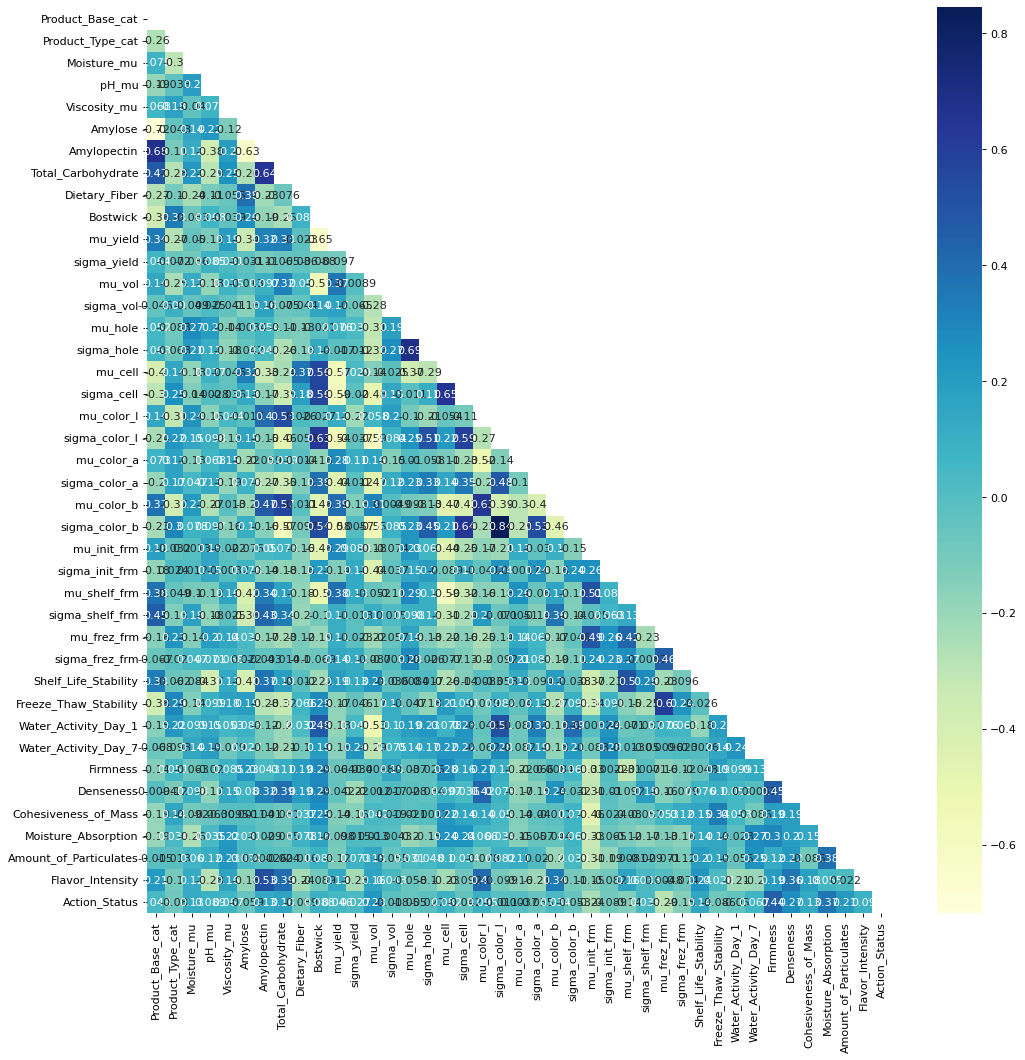

In [31]:
# Hitmap among parameters
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)

mask = np.triu(np.ones_like(data_proc.corr()))
dataplot = sns.heatmap(data_proc.corr(), cmap="YlGnBu", annot=True, mask=mask)

#dataplot.set(axis_bgcolor='k')
#plt.rc('font', **{'size': 10.0})

#dataplot.savefig("output.png")
plt.show()

In [32]:
# Extract Significant Parameters having higher Correlation 
pd.set_option('display.max_rows', None)

corr_abs = data_proc.corr().abs()
corr_abs_val = corr_abs.unstack()
sorted_corr = corr_abs_val.sort_values(kind="quicksort", ascending=False)
significant_corr = sorted_corr[(sorted_corr < 1) & (sorted_corr > np.mean(sorted_corr))]
significant_corr_df = pd.DataFrame(significant_corr, columns = ['correlation'])
significant_corr_df.reset_index(level=[0,1], inplace=True)
significant_corr_df = significant_corr_df.rename(columns={'level_0': 'param_1', 'level_1': 'param_2'})

significant_corr_df.drop_duplicates(subset=['correlation'], keep = 'last', inplace = True)
significant_corr_df.reset_index(inplace=True)
del significant_corr_df['index']

print('Significant Correlation among Parameters')
display(significant_corr_df)

Significant Correlation among Parameters


,param_1,param_2,correlation
0,sigma_color_b,sigma_color_l,0.844369
1,Product_Base_cat,Amylose,0.718407
2,sigma_hole,mu_hole,0.688833
3,Amylopectin,Product_Base_cat,0.675255
4,mu_cell,sigma_cell,0.648491
5,mu_yield,Bostwick,0.645884
6,Total_Carbohydrate,Amylopectin,0.644193
7,sigma_color_b,sigma_cell,0.641132
8,Amylose,Amylopectin,0.633114
9,mu_color_b,mu_color_l,0.631154


## New Approach

In [33]:
#mod_data_Che['Chewy_Texture_(1_=_mushy,_5_=_chewy),_Fail_if_1,2,'].value_counts()
df_all_inp_processed['mu_yield'].value_counts()

89.404    2
90.880    2
90.420    2
90.498    2
90.072    2
89.482    2
89.736    2
90.252    2
91.470    2
91.364    2
91.358    2
90.148    2
91.200    2
91.004    2
91.500    2
87.630    2
90.826    2
88.780    2
90.792    1
89.948    1
90.180    1
90.640    1
90.874    1
91.060    1
90.622    1
89.540    1
91.568    1
90.630    1
90.450    1
91.110    1
90.492    1
90.296    1
90.514    1
90.766    1
90.532    1
92.966    1
91.458    1
91.485    1
90.696    1
90.665    1
90.910    1
89.536    1
89.890    1
90.968    1
90.586    1
91.020    1
89.964    1
87.846    1
92.222    1
91.040    1
88.680    1
89.714    1
90.568    1
91.150    1
91.384    1
91.530    1
90.832    1
90.658    1
90.670    1
91.368    1
90.976    1
89.170    1
90.230    1
91.718    1
90.820    1
90.186    1
91.314    1
91.636    1
91.336    1
90.680    1
90.264    1
91.084    1
91.248    1
90.908    1
90.540    1
90.998    1
90.478    1
90.070    1
84.380    1
Name: mu_yield, dtype: int64

In [34]:
yld = df_all_inp_processed.copy()

In [35]:
#When the yldtwick value is less than or equal to 6.00 , we create a new column called "Batter Viscosity" and 
#whenever the yldtwick value is less than or equal to 6.00 we replace it by 1 else 0
yld['Yield'] = np.where(((yld['mu_yield'] < 88.5) | (yld['mu_yield'] > 91.5)), 0, 1)

In [36]:
#bos['Batter_Viscosity'] = np.where(bos['Bostwick'] > 6.750 , 0, 1)

In [37]:
yld.columns

Index(['Sample_Name', 'Product_Base', 'Product_Type', 'Product_Base_cat',
       'Product_Type_cat', 'Moisture_mu', 'pH_mu', 'Viscosity_mu', 'Amylose',
       'Amylopectin', 'Total_Carbohydrate', 'Dietary_Fiber', 'Bostwick',
       'mu_yield', 'sigma_yield', 'mu_vol', 'sigma_vol', 'mu_hole',
       'sigma_hole', 'mu_cell', 'sigma_cell', 'mu_color_l', 'sigma_color_l',
       'mu_color_a', 'sigma_color_a', 'mu_color_b', 'sigma_color_b',
       'mu_init_frm', 'sigma_init_frm', 'mu_shelf_frm', 'sigma_shelf_frm',
       'mu_frez_frm', 'sigma_frez_frm', 'Shelf_Life_Stability',
       'Freeze_Thaw_Stability', 'Water_Activity_Day_1', 'Water_Activity_Day_7',
       'Firmness', 'Denseness', 'Cohesiveness_of_Mass', 'Moisture_Absorption',
       'Amount_of_Particulates', 'Flavor_Intensity', 'Action_Status', 'Yield'],
      dtype='object')

In [93]:
mu_cols = [col for col in yld.columns if 'sigma' in col]

In [94]:
#print(list(yld.columns))
print(mu_cols) 

['sigma_yield', 'sigma_vol', 'sigma_hole', 'sigma_cell', 'sigma_color_l', 'sigma_color_a', 'sigma_color_b', 'sigma_init_frm', 'sigma_shelf_frm', 'sigma_frez_frm']


In [40]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [41]:
#Considering Bostwick value 23 as an outlier , and removing the outlier 
#bos = bos[bos.Bostwick != 23.000]

In [42]:
yld = movecol(yld, 
             cols_to_move=mu_cols, 
             ref_col='Yield',
             place='Before')
yld.head()

,Sample_Name,Product_Base,Product_Type,Product_Base_cat,Product_Type_cat,Amylose,Amylopectin,Total_Carbohydrate,Dietary_Fiber,Bostwick,sigma_yield,sigma_vol,sigma_hole,sigma_cell,sigma_color_l,sigma_color_a,sigma_color_b,sigma_init_frm,sigma_shelf_frm,sigma_frez_frm,Shelf_Life_Stability,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,Moisture_mu,pH_mu,Viscosity_mu,mu_yield,mu_vol,mu_hole,mu_cell,mu_color_l,mu_color_a,mu_color_b,mu_init_frm,mu_shelf_frm,mu_frez_frm,Yield
0,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,18.6,81.4,83.2,0.0,5.50,0.967745,2.205690,0.423591,0.579107,0.508940,0.631569,1.686238,38.462317,65.337102,40.513074,173.43,-27.83,0.8700,0.8600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.25,545.0,89.404,99.882,1.564327,2.751127,54.708,-4.514,31.010,670.1174,1832.3324,483.6394,1
1,NOVATIONÂ® 3600,Tapioca,Cook Up,8,1,17.0,83.0,89.7,0.0,7.75,2.851780,1.858742,0.753061,0.156647,1.656388,0.579802,1.464404,69.242208,188.164265,34.163383,234.84,-40.33,0.8900,0.8800,1.0,0.0,0.0,1.0,1.0,0.0,1.0,12.5,5.75,540.0,89.170,125.212,0.836410,2.235500,47.452,-0.002,31.236,455.3790,1524.7712,271.7316,1
2,HOMECRAFTÂ® Create 390,Tapioca,Cook Up,8,1,17.0,83.0,89.7,0.0,8.00,0.281603,3.717102,0.880884,0.156463,1.557280,0.471932,0.541830,44.800560,180.404998,29.965599,253.21,-42.92,0.8800,0.8700,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,11.5,5.65,450.0,90.670,125.250,0.652637,2.510711,42.922,-0.738,31.614,419.3516,1481.1774,239.3572,1
3,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,18.6,81.4,83.2,0.0,6.75,0.396270,2.840488,0.861221,0.196216,1.691130,0.413606,1.071434,62.047538,198.309098,23.089390,137.12,-34.62,0.8801,0.8576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.25,940.0,90.826,112.292,0.489991,2.113016,47.962,-1.342,32.072,694.9114,1647.7794,454.3256,1
4,HI-MAIZEÂ® 260,Corn,Cook Up,0,1,70.0,30.0,40.6,48.0,6.50,0.396825,1.874535,0.658315,0.140087,1.274057,0.307197,0.276622,49.944402,88.986008,42.603143,145.62,-27.96,0.8844,0.8293,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,12.0,6.00,482.5,90.658,116.484,0.696569,2.365105,50.172,-1.962,31.308,599.9836,1473.6580,432.2312,1


In [43]:
yld

,Sample_Name,Product_Base,Product_Type,Product_Base_cat,Product_Type_cat,Amylose,Amylopectin,Total_Carbohydrate,Dietary_Fiber,Bostwick,sigma_yield,sigma_vol,sigma_hole,sigma_cell,sigma_color_l,sigma_color_a,sigma_color_b,sigma_init_frm,sigma_shelf_frm,sigma_frez_frm,Shelf_Life_Stability,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,Moisture_mu,pH_mu,Viscosity_mu,mu_yield,mu_vol,mu_hole,mu_cell,mu_color_l,mu_color_a,mu_color_b,mu_init_frm,mu_shelf_frm,mu_frez_frm,Yield
0,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,18.6,81.4,83.20,0.00,5.500,0.967745,2.205690,0.423591,0.579107,0.508940,0.631569,1.686238,38.462317,65.337102,40.513074,173.430,-27.830,0.87000,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000,6.250,545.00,89.404,99.882,1.564327,2.751127,54.7080,-4.5140,31.010,670.1174,1832.332400,483.6394,1
1,NOVATIONÂ® 3600,Tapioca,Cook Up,8,1,17.0,83.0,89.70,0.00,7.750,2.851780,1.858742,0.753061,0.156647,1.656388,0.579802,1.464404,69.242208,188.164265,34.163383,234.840,-40.330,0.89000,0.88000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,12.500,5.750,540.00,89.170,125.212,0.836410,2.235500,47.4520,-0.0020,31.236,455.3790,1524.771200,271.7316,1
2,HOMECRAFTÂ® Create 390,Tapioca,Cook Up,8,1,17.0,83.0,89.70,0.00,8.000,0.281603,3.717102,0.880884,0.156463,1.557280,0.471932,0.541830,44.800560,180.404998,29.965599,253.210,-42.920,0.88000,0.87000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,11.500,5.650,450.00,90.670,125.250,0.652637,2.510711,42.9220,-0.7380,31.614,419.3516,1481.177400,239.3572,1
3,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,18.6,81.4,83.20,0.00,6.750,0.396270,2.840488,0.861221,0.196216,1.691130,0.413606,1.071434,62.047538,198.309098,23.089390,137.120,-34.620,0.88010,0.85760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000,6.250,940.00,90.826,112.292,0.489991,2.113016,47.9620,-1.3420,32.072,694.9114,1647.779400,454.3256,1
4,HI-MAIZEÂ® 260,Corn,Cook Up,0,1,70.0,30.0,40.60,48.00,6.500,0.396825,1.874535,0.658315,0.140087,1.274057,0.307197,0.276622,49.944402,88.986008,42.603143,145.620,-27.960,0.88440,0.82930,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,12.000,6.000,482.50,90.658,116.484,0.696569,2.365105,50.1720,-1.9620,31.308,599.9836,1473.658000,432.2312,1
5,MELOJELÂ®,Corn,Cook Up,0,1,25.0,75.0,97.00,0.00,6.750,0.144637,0.751612,0.004022,0.104148,0.404512,0.244704,0.657244,33.479490,83.116544,40.334649,117.460,-42.970,0.88180,0.82600,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,11.500,5.750,950.00,90.832,120.708,0.002168,2.193392,50.3040,-1.3960,31.712,708.9188,1541.596000,404.2808,1
6,NOVATIONÂ® 8600,Waxy Rice,Cook Up,14,1,1.0,99.0,97.00,0.00,5.000,0.524147,3.596867,0.760583,0.170252,1.187299,0.462006,1.105283,27.208806,404.509912,29.900693,353.870,-58.680,0.86180,0.85300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.875,5.750,275.00,91.004,117.860,0.789724,2.139805,49.4640,0.4400,32.930,460.9166,2091.958600,190.4666,1
7,HOMECRAFTÂ® Create GF 10 (Control),Rice and Tapioca,Cook Up,7,1,18.6,81.4,83.20,0.00,5.750,0.601955,4.047830,0.840003,0.320128,0.871051,0.554392,1.129234,113.245326,177.390087,67.625192,91.680,-53.310,0.85000,0.86000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000,6.250,540.00,91.530,112.496,0.555955,2.306484,41.9860,2.1000,27.732,1040.9038,1995.241000,485.9930,0
8,PURITYÂ® Alpha 801,Rice,Cook Up,6,1,19.0,81.0,80.00,0.00,4.000,0.661234,0.883216,0.528568,0.171268,0.870442,0.371551,0.585944,36.324467,175.405189,49.382003,119.690,-60.070,0.86000,0.87000,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,11.750,6.250,565.00,91.384,109.618,1.362397,2.129066,42.9380,2.3100,28.154,981.0772,2155.338600,391.7586,1
9,PURITYÂ® Alpha 806,Waxy Rice,Cook Up,14,1,1.0,99.0,82.50,0.20,3.250,0.628371,4.023937,0.840927,0.180999,1.807282,0.987411,1.270287,44.401709,119.157918,7.342228,216.070,-55.110,0.87000,0.86000,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,12.000,5.750,750.00,91.150,116.892,0.790477,2.141465,45.1220,1.5860,28.176,673.8646,2129.913000,302.5104,1


In [44]:
Yield_df = yld[['Yield']]

In [45]:
Yield_df['Yield'].value_counts()

1    87
0    10
Name: Yield, dtype: int64

In [46]:
yld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_Name             97 non-null     object 
 1   Product_Base            97 non-null     object 
 2   Product_Type            97 non-null     object 
 3   Product_Base_cat        97 non-null     int32  
 4   Product_Type_cat        97 non-null     int32  
 5   Amylose                 97 non-null     float64
 6   Amylopectin             97 non-null     float64
 7   Total_Carbohydrate      97 non-null     float64
 8   Dietary_Fiber           97 non-null     float64
 9   Bostwick                97 non-null     float64
 10  sigma_yield             97 non-null     float64
 11  sigma_vol               97 non-null     float64
 12  sigma_hole              97 non-null     float64
 13  sigma_cell              97 non-null     float64
 14  sigma_color_l           97 non-null     floa

In [47]:
yld.columns

Index(['Sample_Name', 'Product_Base', 'Product_Type', 'Product_Base_cat',
       'Product_Type_cat', 'Amylose', 'Amylopectin', 'Total_Carbohydrate',
       'Dietary_Fiber', 'Bostwick', 'sigma_yield', 'sigma_vol', 'sigma_hole',
       'sigma_cell', 'sigma_color_l', 'sigma_color_a', 'sigma_color_b',
       'sigma_init_frm', 'sigma_shelf_frm', 'sigma_frez_frm',
       'Shelf_Life_Stability', 'Freeze_Thaw_Stability', 'Water_Activity_Day_1',
       'Water_Activity_Day_7', 'Firmness', 'Denseness', 'Cohesiveness_of_Mass',
       'Moisture_Absorption', 'Amount_of_Particulates', 'Flavor_Intensity',
       'Action_Status', 'Moisture_mu', 'pH_mu', 'Viscosity_mu', 'mu_yield',
       'mu_vol', 'mu_hole', 'mu_cell', 'mu_color_l', 'mu_color_a',
       'mu_color_b', 'mu_init_frm', 'mu_shelf_frm', 'mu_frez_frm', 'Yield'],
      dtype='object')

In [48]:
scaled_data = yld[yld.columns[~yld.columns.isin(['Sample_Name', 'Product_Base', 'Product_Type','mu_yield','sigma_yield','Yield'])]]

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(scaled_data)

In [50]:
data_scaled_num = pd.DataFrame(scaled,columns = scaled_data.columns)
data_scaled_num

,Product_Base_cat,Product_Type_cat,Amylose,Amylopectin,Total_Carbohydrate,Dietary_Fiber,Bostwick,sigma_vol,sigma_hole,sigma_cell,sigma_color_l,sigma_color_a,sigma_color_b,sigma_init_frm,sigma_shelf_frm,sigma_frez_frm,Shelf_Life_Stability,Freeze_Thaw_Stability,Water_Activity_Day_1,Water_Activity_Day_7,Firmness,Denseness,Cohesiveness_of_Mass,Moisture_Absorption,Amount_of_Particulates,Flavor_Intensity,Action_Status,Moisture_mu,pH_mu,Viscosity_mu,mu_vol,mu_hole,mu_cell,mu_color_l,mu_color_a,mu_color_b,mu_init_frm,mu_shelf_frm,mu_frez_frm
0,0.4375,0.083333,0.265714,0.822222,0.832166,0.000000,0.239130,0.040181,0.199107,0.387722,0.023060,0.173377,0.147564,0.187428,0.126132,0.311455,0.349819,0.860392,0.373832,0.523560,0.50,0.50,1.0,0.50,0.50,0.50,0.0,0.571429,0.639535,0.272340,0.561774,7.392651e-01,0.500426,0.968152,0.000000,0.721345,0.261587,0.225765,0.444246
1,0.5000,0.083333,0.242857,0.838384,0.897179,0.000000,0.336957,0.032477,0.354010,0.084762,0.107155,0.153249,0.125979,0.444719,0.368426,0.251835,0.479560,0.643341,0.747664,0.785340,1.00,0.50,1.0,1.00,1.00,0.50,1.0,0.642857,0.523256,0.268085,0.999344,3.952391e-01,0.282031,0.658385,0.560079,0.737719,0.106680,0.162170,0.123141
2,0.5000,0.083333,0.242857,0.838384,0.897179,0.000000,0.347826,0.073742,0.414108,0.084630,0.099891,0.111307,0.036213,0.240410,0.353120,0.212420,0.518370,0.598368,0.560748,0.654450,0.50,0.50,1.0,0.00,0.50,0.50,0.0,0.500000,0.500000,0.191489,1.000000,3.083848e-01,0.398598,0.464993,0.468719,0.765107,0.080690,0.153156,0.074084
3,0.4375,0.083333,0.265714,0.822222,0.832166,0.000000,0.293478,0.054277,0.404863,0.113138,0.109701,0.088629,0.087744,0.384579,0.388438,0.147857,0.273108,0.742490,0.562617,0.492147,0.50,0.50,1.0,0.50,0.50,0.50,0.0,0.571429,0.639535,0.608511,0.776154,2.315155e-01,0.230153,0.680157,0.393744,0.798290,0.279473,0.187605,0.399827
4,0.0000,0.083333,1.000000,0.303030,0.406081,0.558140,0.282609,0.032828,0.309465,0.072886,0.079134,0.047255,0.010409,0.283408,0.172783,0.331079,0.291065,0.858135,0.642991,0.121728,1.00,0.50,1.0,0.00,0.50,0.50,0.0,0.571429,0.581395,0.219149,0.848570,3.291480e-01,0.336926,0.774505,0.316783,0.742936,0.210994,0.151601,0.366347
5,0.0000,0.083333,0.357143,0.757576,0.970194,0.000000,0.293478,0.007893,0.001842,0.047113,0.015407,0.022957,0.047443,0.145776,0.161205,0.309779,0.231572,0.597500,0.594393,0.078534,0.00,0.50,1.0,1.00,0.50,0.50,0.0,0.500000,0.523256,0.617021,0.921538,9.620902e-04,0.264196,0.780140,0.387041,0.772207,0.289578,0.165649,0.323994
6,0.8750,0.083333,0.014286,1.000000,0.970194,0.000000,0.217391,0.071072,0.357547,0.094518,0.072776,0.107448,0.091037,0.093359,0.795198,0.211811,0.731033,0.324709,0.220561,0.431937,0.50,0.50,1.0,0.50,0.50,0.50,1.0,0.553571,0.523256,0.042553,0.872340,3.731743e-01,0.241499,0.744279,0.614945,0.860455,0.110674,0.279449,0.000000
7,0.4375,0.083333,0.265714,0.822222,0.832166,0.000000,0.250000,0.081086,0.394887,0.201999,0.049598,0.143369,0.093368,0.812545,0.347173,0.566022,0.177107,0.417955,0.000000,0.523560,0.50,0.50,1.0,0.50,0.50,0.50,0.0,0.571429,0.639535,0.268085,0.779678,2.626914e-01,0.312097,0.425034,0.821003,0.483843,0.529065,0.259451,0.447812
8,0.3750,0.083333,0.271429,0.818182,0.800160,0.000000,0.173913,0.010816,0.248463,0.095247,0.049554,0.072277,0.040506,0.169558,0.343257,0.394729,0.236283,0.300573,0.186916,0.654450,0.50,0.50,0.0,0.50,1.00,0.50,0.0,0.535714,0.639535,0.289362,0.729961,6.438295e-01,0.236951,0.465676,0.847071,0.514418,0.485907,0.292555,0.305019
9,0.8750,0.083333,0.014286,1.000000,0.825165,0.002326,0.141304,0.080555,0.395322,0.102225,0.118213,0.311734,0.107092,0.237076,0.232302,0.000000,0.439905,0.386699,0.373832,0.523560,0.00,0.50,0.0,0.50,1.00,0.50,0.0,0.571429,0.523256,0.446809,0.855618,3.735302e-01,0.242202,0.558914,0.757200,0.516012,0.264291,0.287297,0.169780


In [51]:
#correlations = X_train.corr()
corr_mat = data_scaled_num.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values( ascending=False).drop_duplicates()
sorted_mat = sorted_mat[sorted_mat>=.8]

In [52]:
sorted_mat

Product_Base_cat  Product_Base_cat    1.000000
sigma_color_b     sigma_color_l       0.844369
dtype: float64

In [53]:
import numpy as np
import pandas as pd
import shap

#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [54]:
data_scaled_num.columns

Index(['Product_Base_cat', 'Product_Type_cat', 'Amylose', 'Amylopectin',
       'Total_Carbohydrate', 'Dietary_Fiber', 'Bostwick', 'sigma_vol',
       'sigma_hole', 'sigma_cell', 'sigma_color_l', 'sigma_color_a',
       'sigma_color_b', 'sigma_init_frm', 'sigma_shelf_frm', 'sigma_frez_frm',
       'Shelf_Life_Stability', 'Freeze_Thaw_Stability', 'Water_Activity_Day_1',
       'Water_Activity_Day_7', 'Firmness', 'Denseness', 'Cohesiveness_of_Mass',
       'Moisture_Absorption', 'Amount_of_Particulates', 'Flavor_Intensity',
       'Action_Status', 'Moisture_mu', 'pH_mu', 'Viscosity_mu', 'mu_vol',
       'mu_hole', 'mu_cell', 'mu_color_l', 'mu_color_a', 'mu_color_b',
       'mu_init_frm', 'mu_shelf_frm', 'mu_frez_frm'],
      dtype='object')

In [55]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

sm_data_scaled_num, sm_Yield_df = sm.fit_resample(data_scaled_num, Yield_df)

print(f'''Shape of X before SMOTE: {data_scaled_num.shape}
Shape of X after SMOTE: {sm_data_scaled_num.shape}''')

print('\nBalance of positive and negative classes (%):')
sm_Yield_df.value_counts(normalize=True) * 100

Shape of X before SMOTE: (97, 39)
Shape of X after SMOTE: (174, 39)

Balance of positive and negative classes (%):


Yield
0        50.0
1        50.0
dtype: float64

In [56]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sm_data_scaled_num,sm_Yield_df,test_size=0.2,random_state=47,stratify=sm_Yield_df)

In [57]:
#Best accuracy for DecisionTreeClassifier() algorithm is 1.0 for random state 66
#from sklearn.tree import DecisionTreeClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

[15:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_train.value_counts()

Yield
0        70
1        69
dtype: int64

In [59]:
y_test.value_counts()

Yield
1        18
0        17
dtype: int64

In [60]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
#accuracy = accuracy_score(y_test, predictions)

In [61]:
y_test.head()

,Yield
89,0
65,1
110,0
142,0
94,1


In [62]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [63]:
#y_pred = xg_reg.predict(test)

# make predictions for test data
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.14%


In [64]:
from sklearn.metrics import classification_report
#classification_report(y_test, y_pred)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        18

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [66]:
'''# plot feature importance
plt.figure(figsize=(13,8))
from xgboost import plot_importance
#from matplotlib import pyplot
plot_importance(model)
#pyplot.show()
plt.show()'''

'# plot feature importance\nplt.figure(figsize=(13,8))\nfrom xgboost import plot_importance\n#from matplotlib import pyplot\nplot_importance(model)\n#pyplot.show()\nplt.show()'

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [68]:
# Finding the best fit ML algo's and tuning random state.
MLAlgos_list=[XGBClassifier(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(),SVC(),GradientBoostingClassifier()]
for algo in MLAlgos_list:
    max_acc=0
    active_acc=0
    iBest_rs=0
    model=algo
    for iActive_rs in range(42,101):
        #x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=iActive_rs, test_size=0.2)
        x_train,x_test,y_train,y_test=train_test_split(sm_data_scaled_num,sm_Yield_df,test_size=0.2,random_state=iActive_rs,stratify=sm_Yield_df)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        active_acc=accuracy_score(pred,y_test)
        if active_acc>max_acc:
            max_acc=active_acc
            iBest_rs=iActive_rs
    print("Best accuracy for {} algorithm is {} for random state {}.".format(algo,max_acc,iBest_rs))

[15:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best accuracy for XGBClassifier(base_score=0.5, booster='gbtree', cols

In [69]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sm_data_scaled_num,sm_Yield_df,test_size=0.2,random_state=42,stratify=sm_Yield_df)

In [70]:
#Best accuracy for DecisionTreeClassifier() algorithm is 1.0 for random state 66
#from sklearn.tree import DecisionTreeClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

[15:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = model.predict(X_test)

In [72]:
#y_pred = xg_reg.predict(test)

# make predictions for test data
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [73]:
from sklearn.metrics import classification_report
#classification_report(y_test, y_pred)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



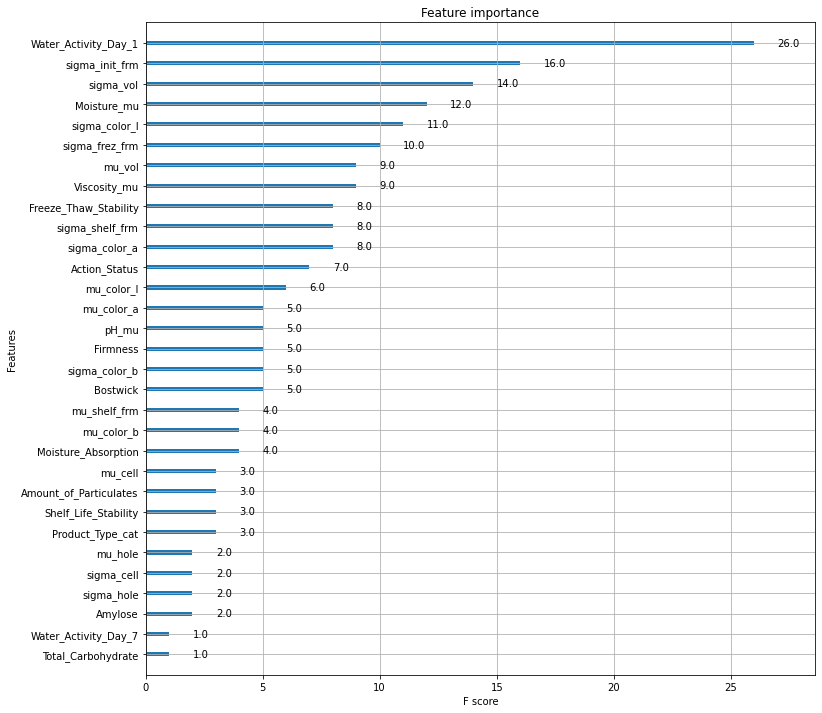

In [75]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,12))
plot_importance(model, ax = ax)
plt.show()

In [76]:
model.feature_importances_

array([0.        , 0.00941482, 0.04107099, 0.        , 0.02150423,
       0.        , 0.01187117, 0.05590606, 0.03271681, 0.0232312 ,
       0.0070503 , 0.04602732, 0.00350406, 0.01238323, 0.02585278,
       0.01495703, 0.02335683, 0.03911173, 0.01874001, 0.00351585,
       0.00506035, 0.        , 0.        , 0.06239529, 0.22840038,
       0.        , 0.03217641, 0.03023724, 0.02369142, 0.01733921,
       0.09675968, 0.0828703 , 0.00055191, 0.01000127, 0.00813457,
       0.01111293, 0.        , 0.00105453, 0.        ], dtype=float32)

In [77]:
#model_sum = np.abs(model.feature_importances_).mean(axis=0)
feature_imp_df = pd.DataFrame([X_test.columns.tolist(), model.feature_importances_.tolist()]).T
feature_imp_df.columns = ['column_name', 'feature_importance']
feature_imp_df = feature_imp_df.sort_values('feature_importance', ascending=False)
feature_imp_df

,column_name,feature_importance
24,Amount_of_Particulates,0.2284
30,mu_vol,0.09676
31,mu_hole,0.08287
23,Moisture_Absorption,0.062395
7,sigma_vol,0.055906
11,sigma_color_a,0.046027
2,Amylose,0.041071
17,Freeze_Thaw_Stability,0.039112
8,sigma_hole,0.032717
26,Action_Status,0.032176


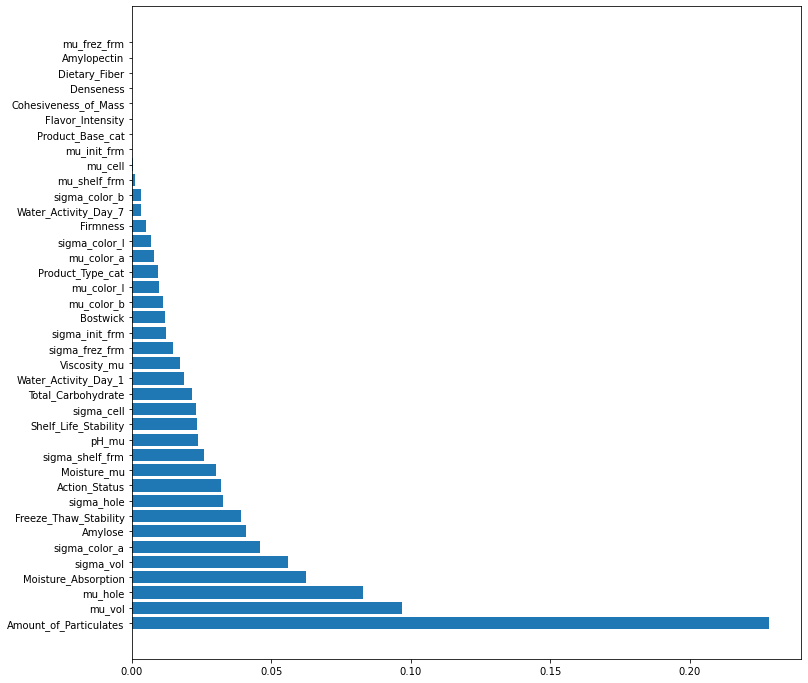

In [78]:
fig, ax = plt.subplots(figsize=(12,12))
plt.barh(feature_imp_df.column_name, feature_imp_df.feature_importance)
plt.show()

In [79]:
perm_importance = permutation_importance(model, X_test, y_test)

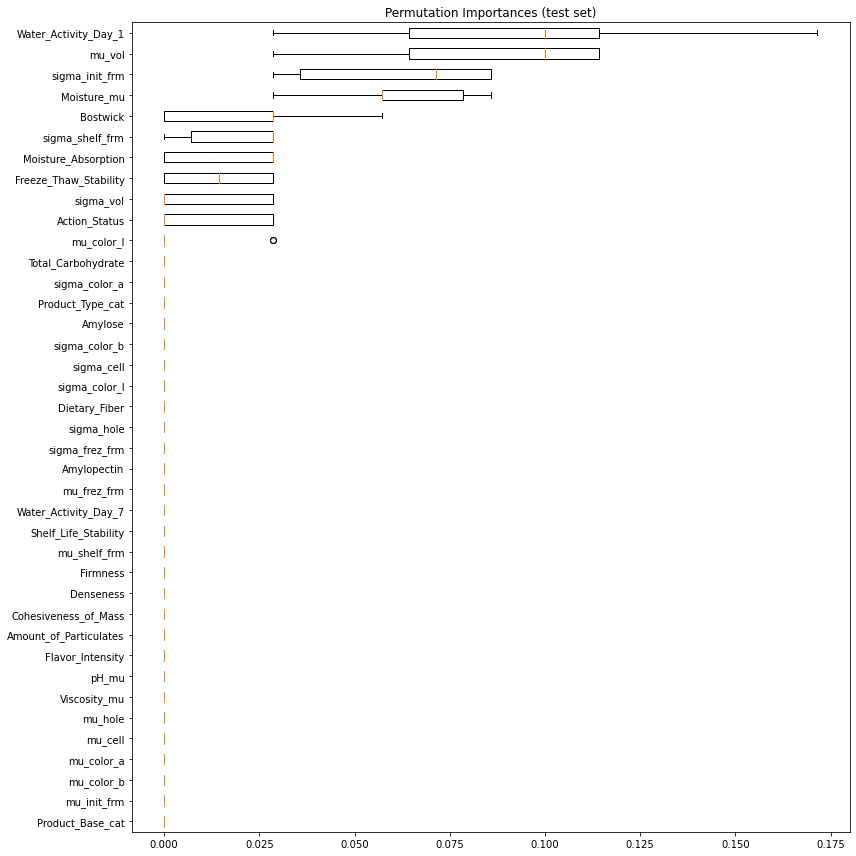

In [80]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12,12))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [81]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

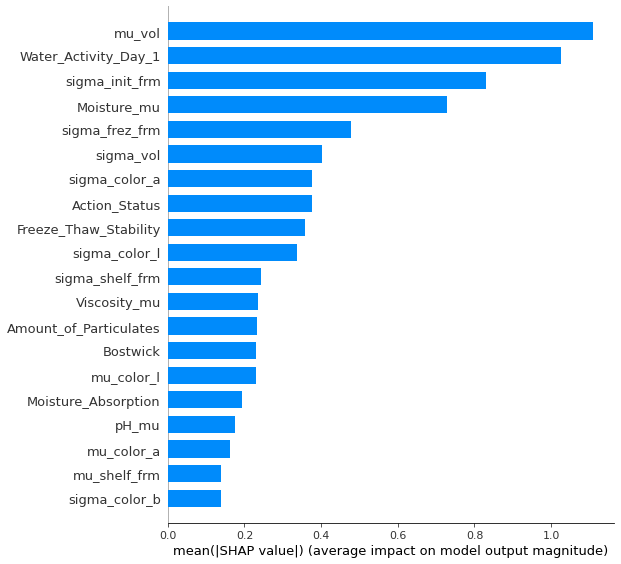

In [82]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [83]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
30,mu_vol,1.109209
18,Water_Activity_Day_1,1.025752
13,sigma_init_frm,0.831139
27,Moisture_mu,0.729376
15,sigma_frez_frm,0.478912
7,sigma_vol,0.402318
11,sigma_color_a,0.376879
26,Action_Status,0.37673
17,Freeze_Thaw_Stability,0.357655
10,sigma_color_l,0.335725


In [84]:
shap_var_list = list(importance_df['column_name'])

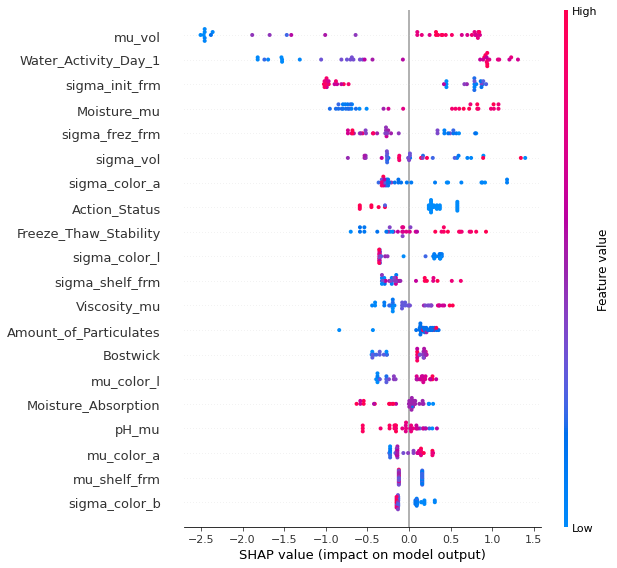

In [85]:
shap.summary_plot(shap_values, X_test)

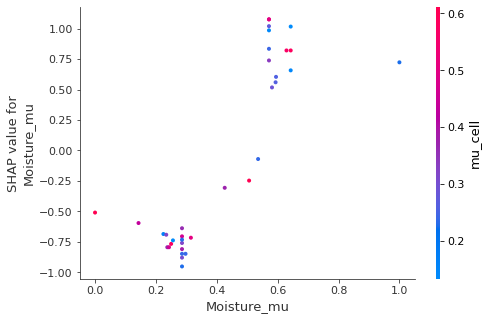

In [86]:
shap.dependence_plot("Moisture_mu", shap_values, X_test)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [88]:
top_ten = 10
#print()
col = shap_var_list[:top_ten]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sm_data_scaled_num[col],sm_Yield_df,test_size=0.2,
                                               random_state=20,stratify=sm_Yield_df)

In [89]:
model = XGBClassifier()
model.fit(X_train, y_train)

[15:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [91]:
# make predictions for test data
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.14%


In [92]:
# Finding the best fit ML algo's and tuning random state.
MLAlgos_list=[XGBClassifier(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(),SVC(),GradientBoostingClassifier()]
for algo in MLAlgos_list:
    max_acc=0
    active_acc=0
    iBest_rs=0
    model=algo
    for iActive_rs in range(1,101):
        #x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=iActive_rs, test_size=0.2)
        x_train,x_test,y_train,y_test=train_test_split(data_scaled_num[col],Yield_df,test_size=0.2,random_state=iActive_rs,stratify=Yield_df)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        active_acc=accuracy_score(pred,y_test)
        if active_acc>max_acc:
            max_acc=active_acc
            iBest_rs=iActive_rs
    print("Best accuracy for {} algorithm is {} for random state {}.".format(algo,max_acc,iBest_rs))

[15:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel